In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers,models
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, Flatten, MaxPooling2D, Dropout

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
len(x_train[1])

32

In [4]:
len(x_train[1][1])

32

that defines that that the dataset if of 32x32 px images 

In [5]:
import matplotlib.pyplot as plt

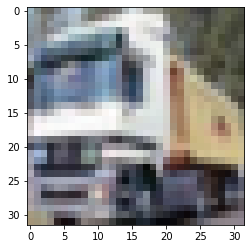

In [6]:
plt.imshow(x_train[1])

In [7]:
y_train.reshape(-1)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
model = models.Sequential()

In [9]:
model.add(Convolution2D(64, (5, 5), activation='relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 140s 89ms/step - loss: 1.6045 - accuracy: 0.4114 - val_loss: 1.3515 - val_accuracy: 0.5112
Epoch 2/10
1563/1563 [==============================] - 166s 106ms/step - loss: 1.3045 - accuracy: 0.5323 - val_loss: 1.1933 - val_accuracy: 0.5741
Epoch 3/10
1563/1563 [==============================] - 150s 96ms/step - loss: 1.1790 - accuracy: 0.5778 - val_loss: 1.1507 - val_accuracy: 0.5922
Epoch 4/10
1563/1563 [==============================] - 137s 88ms/step - loss: 1.0812 - accuracy: 0.6155 - val_loss: 1.1506 - val_accuracy: 0.5895
Epoch 5/10
1563/1563 [==============================] - 177s 113ms/step - loss: 1.0138 - accuracy: 0.6381 - val_loss: 1.0823 - val_accuracy: 0.6179
Epoch 6/10
1563/1563 [==============================] - 158s 101ms/step - loss: 0.9463 - accuracy: 0.6647 - val_loss: 1.0373 - val_accuracy: 0.6357
Epoch 7/10
1563/1563 [==============================] - 166s 106ms/step - loss: 0.8923 - accuracy: 0.6836 - val_loss: 1.0258 -

Model2

In [13]:
model1 = models.Sequential()
model1.add(Convolution2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model1.add(MaxPooling2D((3,2)))
model1.add(Convolution2D(32, (3, 3), activation='relu', padding='same'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(10, activation='softmax'))

In [14]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 16, 32)        18464     
                                                                 
 flatten_1 (Flatten)         (None, 5120)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               655488    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [15]:
model1.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

The error below is because of the epochs were stopped because of overfitting

In [26]:
his = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 135s 87ms/step - loss: 0.7400 - accuracy: 0.7359 - val_loss: 1.0225 - val_accuracy: 0.6609
Epoch 2/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.6973 - accuracy: 0.7482 - val_loss: 1.0307 - val_accuracy: 0.6599
Epoch 3/10
1563/1563 [==============================] - 134s 85ms/step - loss: 0.6696 - accuracy: 0.7602 - val_loss: 1.0409 - val_accuracy: 0.6619
Epoch 4/10
1563/1563 [==============================] - 135s 86ms/step - loss: 0.6316 - accuracy: 0.7734 - val_loss: 1.0742 - val_accuracy: 0.6521
Epoch 5/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.6051 - accuracy: 0.7822 - val_loss: 1.1192 - val_accuracy: 0.6536
Epoch 6/10
1563/1563 [==============================] - 135s 86ms/step - loss: 0.5759 - accuracy: 0.7904 - val_loss: 1.1493 - val_accuracy: 0.6529
Epoch 7/10
1563/1563 [==============================] - 135s 87ms/step - loss: 0.5526 - accuracy: 0.8001 - val_loss: 1

KeyboardInterrupt: ignored

Model 3 

In [16]:
model2 = Sequential()
model2.add(Convolution2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'))
model2.add(MaxPooling2D(2, 2))
model2.add(Convolution2D(16, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(2, 2))
model2.add(Convolution2D(16, (3, 3), activation='relu', padding='same'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10))

In [17]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 16)        9232      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          2320      
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [18]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
his = model2.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 125s 79ms/step - loss: 1.6513 - accuracy: 0.3979 - val_loss: 1.4112 - val_accuracy: 0.4893
Epoch 2/10
1563/1563 [==============================] - 121s 78ms/step - loss: 1.3557 - accuracy: 0.5142 - val_loss: 1.2472 - val_accuracy: 0.5544
Epoch 3/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.2400 - accuracy: 0.5590 - val_loss: 1.1783 - val_accuracy: 0.5804
Epoch 4/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.1609 - accuracy: 0.5854 - val_loss: 1.1580 - val_accuracy: 0.5912
Epoch 5/10
1563/1563 [==============================] - 121s 78ms/step - loss: 1.0950 - accuracy: 0.6121 - val_loss: 1.0891 - val_accuracy: 0.6106
Epoch 6/10
1563/1563 [==============================] - 121s 77ms/step - loss: 1.0374 - accuracy: 0.6323 - val_loss: 1.0559 - val_accuracy: 0.6212
Epoch 7/10
1563/1563 [==============================] - 121s 77ms/step - loss: 1.0028 - accuracy: 0.6430 - val_loss: 1